## To replicate the sentiment analysis with data from twitter:
### A. Start a notebook instance in machine Learning Lab 
### B. Open the example link and download the source code from Github repository.
### C. Copy, paste and modify the python code file in the notebook

## HW6 Sentiment Analysis and Word Cloud

In [1]:
# Install Libraries
!pip install textblob
!pip install tweepy
!pip install pycountry
!pip install wordcloud
!pip install langdetect

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 636.8/636.8 kB 13.3 MB/s eta 0:00:00a 0:00:01
Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 151.7/151.7 kB 18.3 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 33.4 MB/s eta 0:00:0000:010:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for pycountry: filename=pycountry-22.3.5-py2.py3-none-any.whl size=10681832 sha256=760056c06fface525ddefc059ee575d900fc83e86da086b959a63f1fb00269b9
  Stored in directory: /home/ec2-user/.cache/pip/wheels/62/4a/9c/7a46699df9efb845aa116fae5e52d8690fc442fef6d

In [2]:
# Import Libraries

from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import pycountry
import re
import string
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/ec2-user/nltk_data...


True

# Step 2: Authentication for Twitter API

In [3]:
# Authentication
consumerKey = "dsqdagzypVWUc2tf4X5RM6dTb"
consumerSecret = "EFu6YsXBkKciE4FNkB0n7gD5ZzQGLVTGlwHyN5YSuuomBnjEsv"
accessToken = "1651651171172360211-YYlzqjjesfVDs1wcTNKr94rYvEYokE"
accessTokenSecret = "UvGOZHg4qdO9XChLYIkQJzB47PVedYq98A4D9wCyOp0ra"

auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth)

# Step 3: Getting Tweets With Keyword or Hashtag

In [4]:
#Sentiment Analysis
def percentage(part,whole):
    return 100 * float(part)/float(whole) 

keyword = input("Please enter keyword or hashtag to search: ")
noOfTweet = int(input ("Please enter how many tweets to analyze: "))


tweets = tweepy.Cursor(api.search_tweets, q=keyword).items(noOfTweet)
positive  = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []



for tweet in tweets:
    
    #print(tweet.text)
    tweet_list.append(tweet.text)
    analysis = TextBlob(tweet.text)
    score = SentimentIntensityAnalyzer().polarity_scores(tweet.text)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    polarity += analysis.sentiment.polarity
    
    if neg > pos:
        negative_list.append(tweet.text)
        negative += 1

    elif pos > neg:
        positive_list.append(tweet.text)
        positive += 1
    
    elif pos == neg:
        neutral_list.append(tweet.text)
        neutral += 1

positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')
 


Please enter keyword or hashtag to search:  UCM
Please enter how many tweets to analyze:  500


In [5]:
#Number of Tweets (Total, Positive, Negative, Neutral)
tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print("total number: ",len(tweet_list))
print("positive number: ",len(positive_list))
print("negative number: ", len(negative_list))
print("neutral number: ",len(neutral_list))

total number:  500
positive number:  48
negative number:  48
neutral number:  404


In [6]:
tweet_list

,0
0,@t_sagul Cualquiera de las dos primeras pelícu...
1,#GHOSTCLUB https://t.co/Q9EOmoCX6T
2,Con el objetivo de contribuir a satisfacer las...
3,"@brucebatman007 Encima no tiene sentido, porqu..."
4,RT @IGeociencias: En mayo nuestra #Geocientífi...
...,...
495,RT @Peli_Comic: El UCM empezó hace 15 años. Yo...
496,@ApeironEz @Espaltagos @ARKeind02 @ElbuenEchoe...
497,RT @ThePortalReport: Central Missouri (D2) tra...
498,RT @ThePortalReport: Central Missouri (D2) tra...


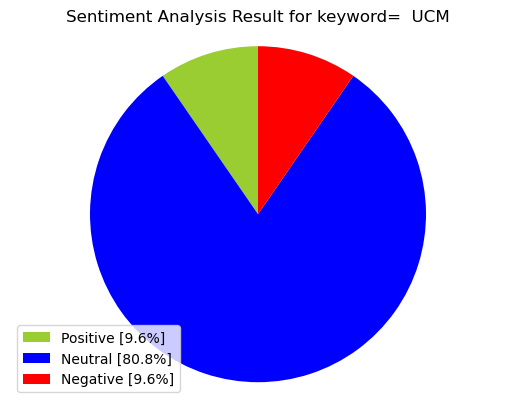

In [7]:
#Creating PieCart

labels = ['Positive ['+str(positive)+'%]' , 'Neutral ['+str(neutral)+'%]','Negative ['+str(negative)+'%]']
sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title("Sentiment Analysis Result for keyword=  "+keyword+"" )
plt.axis('equal')
plt.show()

In [8]:
tweet_list.drop_duplicates(inplace = True)

# Extracting text values

In [9]:
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]
tw_list

,0,text
0,@t_sagul Cualquiera de las dos primeras pelícu...,@t_sagul Cualquiera de las dos primeras pelícu...
1,#GHOSTCLUB https://t.co/Q9EOmoCX6T,#GHOSTCLUB https://t.co/Q9EOmoCX6T
2,Con el objetivo de contribuir a satisfacer las...,Con el objetivo de contribuir a satisfacer las...
3,"@brucebatman007 Encima no tiene sentido, porqu...","@brucebatman007 Encima no tiene sentido, porqu..."
4,RT @IGeociencias: En mayo nuestra #Geocientífi...,RT @IGeociencias: En mayo nuestra #Geocientífi...
...,...,...
491,Que buena película es Guardians Of The Galaxy ...,Que buena película es Guardians Of The Galaxy ...
492,"@BoxReport @Novinxxxy Discordo, Portal.\n260M ...","@BoxReport @Novinxxxy Discordo, Portal.\n260M ..."
494,"""A melhor trilogia do UCM"" \n\nprovavelmente, ...","""A melhor trilogia do UCM"" \n\nprovavelmente, ..."
496,@ApeironEz @Espaltagos @ARKeind02 @ElbuenEchoe...,@ApeironEz @Espaltagos @ARKeind02 @ElbuenEchoe...


In [10]:
#Cleaning Text (RT, Punctuation etc)

#Creating new dataframe and new features
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]

#Removing RT, Punctuation etc
remove_rt = lambda x: re.sub('RT @\w+: '," ",x)
rt = lambda x: re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x)
tw_list["text"] = tw_list.text.map(remove_rt).map(rt)
tw_list["text"] = tw_list.text.str.lower()
tw_list.head(10)

,0,text
0,@t_sagul Cualquiera de las dos primeras pelícu...,sagul cualquiera de las dos primeras pel cul...
1,#GHOSTCLUB https://t.co/Q9EOmoCX6T,ghostclub
2,Con el objetivo de contribuir a satisfacer las...,con el objetivo de contribuir a satisfacer las...
3,"@brucebatman007 Encima no tiene sentido, porqu...",encima no tiene sentido porque en ese unive...
4,RT @IGeociencias: En mayo nuestra #Geocientífi...,en mayo nuestra geocient ficadelmes est ded...
5,"@BenCoisaBRA Sim, mas pelo que tô vendo no UCM...",sim mas pelo que t vendo no ucm das grande...
6,El próximo 10 de mayo tendré el honor de parti...,el pr ximo 10 de mayo tendr el honor de parti...
7,⚠️Ampliación de plazo de solicitudes⚠️\n🗓️ has...,ampliaci n de plazo de solicitudes hast...
8,RT @AlbertLaro_: Tenía 12. Creo que pertenezco...,ten a 12 creo que pertenezco a la generaci n...
9,RT @ucmerced: Teams of students from throughou...,teams of students from throughout california ...


In [11]:
#Calculating Negative, Positive, Neutral and Compound values

tw_list[['polarity', 'subjectivity']] = tw_list['text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in tw_list['text'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if neg > pos:
        tw_list.loc[index, 'sentiment'] = "negative"
    elif pos > neg:
        tw_list.loc[index, 'sentiment'] = "positive"
    else:
        tw_list.loc[index, 'sentiment'] = "neutral"
    tw_list.loc[index, 'neg'] = neg
    tw_list.loc[index, 'neu'] = neu
    tw_list.loc[index, 'pos'] = pos
    tw_list.loc[index, 'compound'] = comp

tw_list.head(10)

/tmp/ipykernel_7460/4219357815.py:4: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for index, row in tw_list['text'].iteritems():


,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,@t_sagul Cualquiera de las dos primeras pelícu...,sagul cualquiera de las dos primeras pel cul...,0.00,0.0,neutral,0.000,1.000,0.000,0.0000
1,#GHOSTCLUB https://t.co/Q9EOmoCX6T,ghostclub,0.00,0.0,neutral,0.000,1.000,0.000,0.0000
2,Con el objetivo de contribuir a satisfacer las...,con el objetivo de contribuir a satisfacer las...,0.70,0.9,positive,0.000,0.811,0.189,0.5423
3,"@brucebatman007 Encima no tiene sentido, porqu...",encima no tiene sentido porque en ese unive...,0.00,0.0,negative,0.115,0.885,0.000,-0.2960
4,RT @IGeociencias: En mayo nuestra #Geocientífi...,en mayo nuestra geocient ficadelmes est ded...,0.00,0.0,neutral,0.000,1.000,0.000,0.0000
5,"@BenCoisaBRA Sim, mas pelo que tô vendo no UCM...",sim mas pelo que t vendo no ucm das grande...,0.00,0.0,negative,0.115,0.885,0.000,-0.2960
6,El próximo 10 de mayo tendré el honor de parti...,el pr ximo 10 de mayo tendr el honor de parti...,0.00,0.0,positive,0.000,0.849,0.151,0.4939
7,⚠️Ampliación de plazo de solicitudes⚠️\n🗓️ has...,ampliaci n de plazo de solicitudes hast...,0.00,0.0,neutral,0.000,1.000,0.000,0.0000
8,RT @AlbertLaro_: Tenía 12. Creo que pertenezco...,ten a 12 creo que pertenezco a la generaci n...,0.00,0.0,negative,0.104,0.896,0.000,-0.2960
9,RT @ucmerced: Teams of students from throughou...,teams of students from throughout california ...,-0.05,0.4,positive,0.000,0.936,0.064,0.0772


In [12]:
#Creating new data frames for all sentiments (positive, negative and neutral)

tw_list_negative = tw_list[tw_list["sentiment"]=="negative"]
tw_list_positive = tw_list[tw_list["sentiment"]=="positive"]
tw_list_neutral = tw_list[tw_list["sentiment"]=="neutral"]

In [13]:
#Function for count_values_in single columns

def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])

In [14]:
#Count_values for sentiment
count_values_in_column(tw_list,"sentiment")

,Total,Percentage
neutral,268,72.04
negative,54,14.52
positive,50,13.44


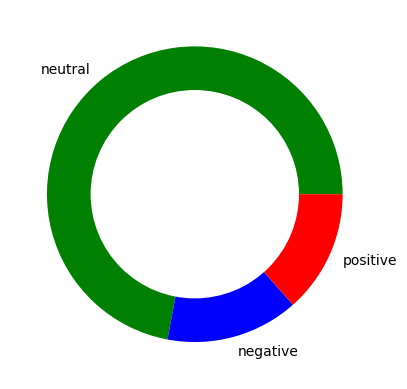

In [15]:
# create data for Pie Chart
pc = count_values_in_column(tw_list,"sentiment")
names= pc.index
size=pc["Percentage"]
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=names, colors=['green','blue','red'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [16]:
#Function to Create Wordcloud

def create_wordcloud(text):
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color="white", width=600, height=400,               
                  max_words=300,
                  stopwords=stopwords,
                  repeat=True)
    wc.generate(str(text))
    
    plt.imshow(wc)
    plt.show()



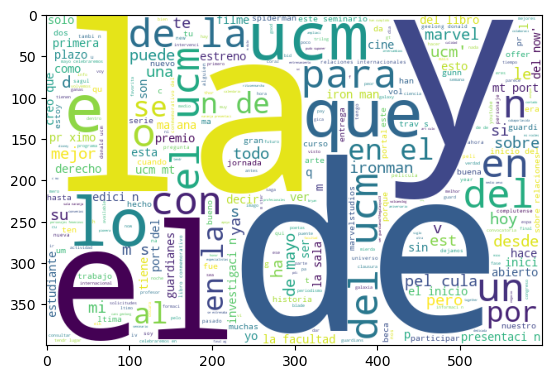

In [17]:
#Creating wordcloud for all tweets
create_wordcloud(tw_list["text"].values)

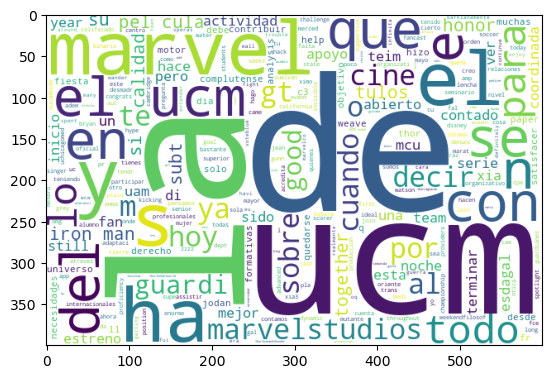

In [18]:
#Creating wordcloud for positive sentiment
create_wordcloud(tw_list_positive["text"].values)

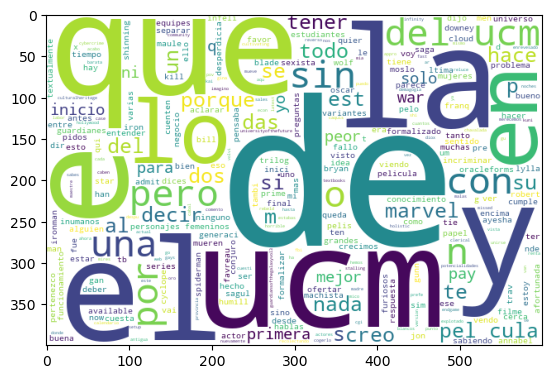

In [19]:
#Creating wordcloud for negative sentiment
create_wordcloud(tw_list_negative["text"].values)

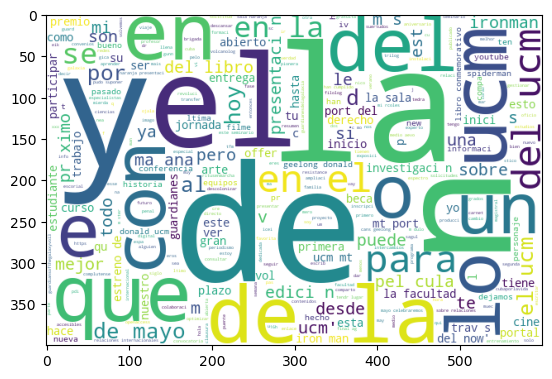

In [20]:
#Creating wordcloud for neutral sentiment
create_wordcloud(tw_list_neutral["text"].values)